<h2>Libraries</h2>

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, confusion_matrix, classification_report, accuracy_score

<h2>Dataset</h2>

In [167]:
data = pd.read_csv("heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [168]:
data.shape

(918, 12)

In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [170]:
object_cols = data.select_dtypes(include="object").columns
data[object_cols] = data[object_cols].astype("string")
data.dtypes

Age                 int64
Sex                string
ChestPainType      string
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         string
MaxHR               int64
ExerciseAngina     string
Oldpeak           float64
ST_Slope           string
HeartDisease        int64
dtype: object

In [171]:
categorical_cols = list(data.select_dtypes(include="string").columns)
print(categorical_cols)

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [172]:
numerical_cols = list(data.select_dtypes(exclude="string").columns)
print(numerical_cols)

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


In [173]:
data.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [174]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [175]:
data.describe(include="string")

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [176]:
data.corr(method="pearson", numeric_only=True)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


Text(0.5, 1.0, 'Correlation of numerical attributes with HeartDisease')

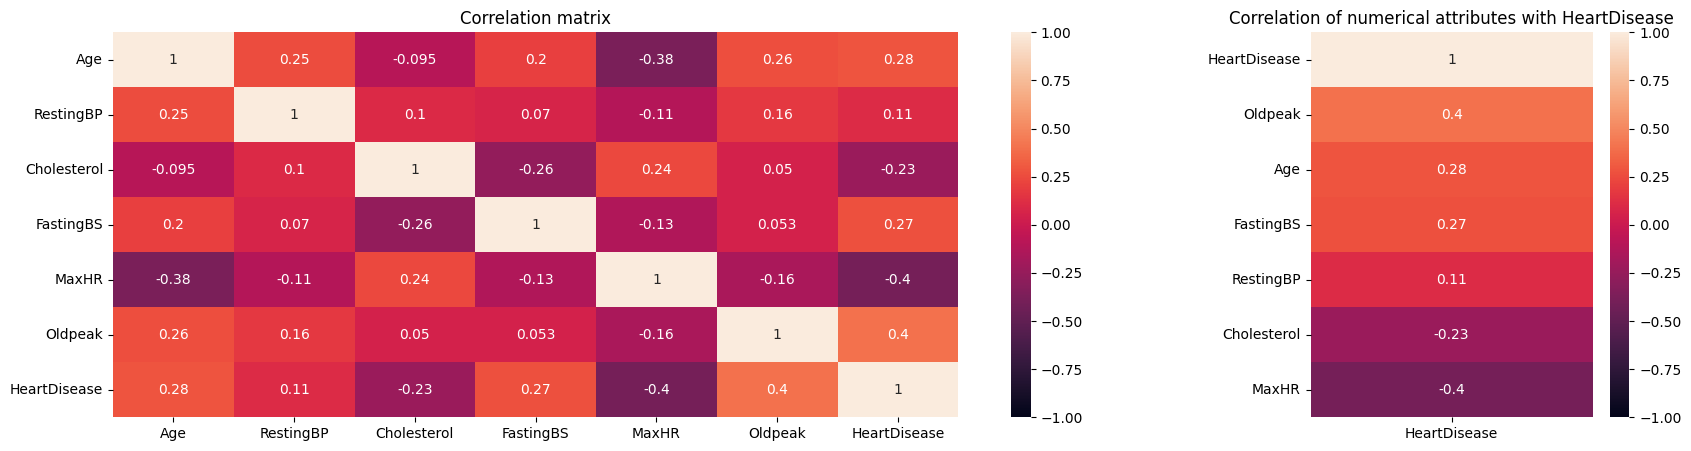

In [177]:
f, axs = plt.subplots(1, 2, figsize=(20, 5), width_ratios=[3, 1])

sns.heatmap(data=data.corr(method="pearson", numeric_only=True), vmin=-1, vmax=1, annot=True, ax=axs[0])
axs[0].set_title("Correlation matrix")

sns.heatmap(data=data.corr(method="pearson", numeric_only=True)[["HeartDisease"]].sort_values('HeartDisease', ascending=False), vmin=-1, vmax=1, annot=True, ax=axs[1])
axs[1].set_title("Correlation of numerical attributes with HeartDisease")

In [178]:
data_holder = pd.DataFrame(data.HeartDisease.value_counts())
data_holder.columns = ["Count"]
data_holder["Percentage"] = (data_holder["Count"] / data_holder["Count"].sum()) * 100
print(data_holder)

   Count  Percentage
1    508   55.337691
0    410   44.662309


Text(0.5, 1.0, 'Distribution of target class')

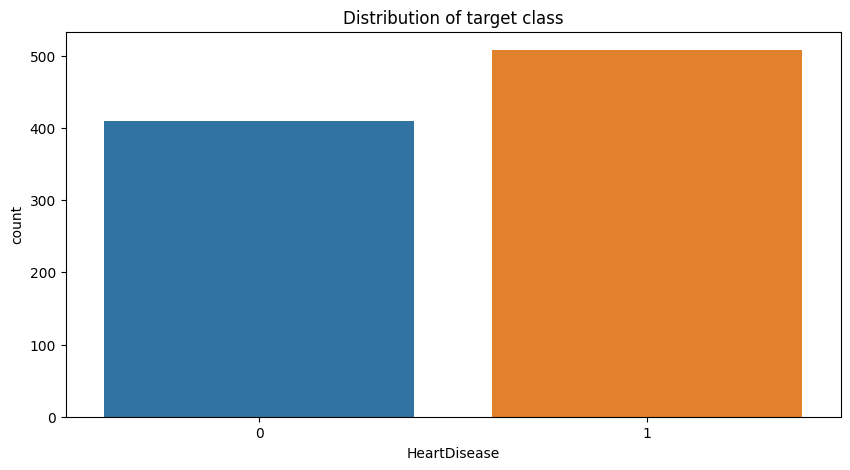

In [179]:
plt.figure(figsize=(10, 5))
sns.countplot(x="HeartDisease", data=data)
plt.title("Distribution of target class")

In [180]:
plt.figure(figsize=(20, 10))
fig = px.histogram(data_frame=data, x="Age", nbins=15, title="Distribution of Age")
fig.update_traces(marker={"color": "red", "opacity": 0.6, "line": {"width": 4, "color": "black"}})
fig.show()



<Figure size 2000x1000 with 0 Axes>

In [181]:
plt.figure(figsize=(20, 10))
fig = px.histogram(data_frame=data, x="Sex", title="Distribution of Sex")
fig.update_traces(marker={"color": "red", "opacity": 0.6, "line": {"width": 4, "color": "black"}})
fig.show()

<Figure size 2000x1000 with 0 Axes>

In [182]:
plt.figure(figsize=(20, 10))
fig = px.histogram(data_frame=data, x="ChestPainType", title="Distribution of ChestPain Type")
fig.update_traces(marker={"color": "red", "opacity": 0.6, "line": {"width": 4, "color": "black"}})
fig.show()

<Figure size 2000x1000 with 0 Axes>

In [183]:
plt.figure(figsize=(20, 10))
fig = px.histogram(data_frame=data, x="RestingBP", title="Distribution of RestingBP")
fig.update_traces(marker={"color": "red", "opacity": 0.6, "line": {"width": 4, "color": "black"}})
fig.show()



<Figure size 2000x1000 with 0 Axes>

In [184]:
plt.figure(figsize=(20, 10))
fig = px.histogram(data_frame=data, x="Cholesterol", title="Distribution of Cholesterol")
fig.update_traces(marker={"color": "red", "opacity": 0.6, "line": {"width": 4, "color": "black"}})
fig.show()



<Figure size 2000x1000 with 0 Axes>

In [185]:
plt.figure(figsize=(20, 10))
fig = px.histogram(data_frame=data, x="FastingBS", title="Distribution of FastingBS")
fig.update_traces(marker={"color": "red", "opacity": 0.6, "line": {"width": 4, "color": "black"}})
fig.show()

<Figure size 2000x1000 with 0 Axes>

In [186]:
plt.figure(figsize=(20, 10))
fig = px.histogram(data_frame=data, x="RestingECG", title="Distribution of RestingECG")
fig.update_traces(marker={"color": "red", "opacity": 0.6, "line": {"width": 4, "color": "black"}})
fig.show()

<Figure size 2000x1000 with 0 Axes>

In [187]:
plt.figure(figsize=(20, 10))
fig = px.histogram(data_frame=data, x="MaxHR", title="Distribution of MaxHR")
fig.update_traces(marker={"color": "red", "opacity": 0.6, "line": {"width": 4, "color": "black"}})
fig.show()



<Figure size 2000x1000 with 0 Axes>

In [188]:
plt.figure(figsize=(20, 10))
fig = px.histogram(data_frame=data, x="ExerciseAngina", title="Distribution of ExerciseAngina")
fig.update_traces(marker={"color": "red", "opacity": 0.6, "line": {"width": 4, "color": "black"}})
fig.show()

<Figure size 2000x1000 with 0 Axes>

In [189]:
plt.figure(figsize=(20, 10))
fig = px.histogram(data_frame=data, x="Oldpeak", title="Distribution of Oldpeak")
fig.update_traces(marker={"color": "red", "opacity": 0.6, "line": {"width": 4, "color": "black"}})
fig.show()



<Figure size 2000x1000 with 0 Axes>

In [190]:
plt.figure(figsize=(20, 10))
fig = px.histogram(data_frame=data, x="ST_Slope", title="Distribution of ST_Slope")
fig.update_traces(marker={"color": "red", "opacity": 0.6, "line": {"width": 4, "color": "black"}})
fig.show()

<Figure size 2000x1000 with 0 Axes>

In [191]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [192]:
print(categorical_cols)

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [193]:
for col in categorical_cols:
    print("The input values in {} are:".format(col))
    print(data[col].value_counts())
    print("\n")

The input values in Sex are:
M    725
F    193
Name: Sex, dtype: Int64


The input values in ChestPainType are:
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: Int64


The input values in RestingECG are:
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: Int64


The input values in ExerciseAngina are:
N    547
Y    371
Name: ExerciseAngina, dtype: Int64


The input values in ST_Slope are:
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: Int64




In [194]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [195]:
ordinal_encoder = OrdinalEncoder()
data[categorical_cols] = ordinal_encoder.fit_transform(data[categorical_cols])
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1.0,1.0,140,289,0,1.0,172,0.0,0.0,2.0,0
1,49,0.0,2.0,160,180,0,1.0,156,0.0,1.0,1.0,1
2,37,1.0,1.0,130,283,0,2.0,98,0.0,0.0,2.0,0
3,48,0.0,0.0,138,214,0,1.0,108,1.0,1.5,1.0,1
4,54,1.0,2.0,150,195,0,1.0,122,0.0,0.0,2.0,0


In [196]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1.0,1.0,140,289,0,1.0,172,0.0,0.0,2.0,0
1,49,0.0,2.0,160,180,0,1.0,156,0.0,1.0,1.0,1
2,37,1.0,1.0,130,283,0,2.0,98,0.0,0.0,2.0,0
3,48,0.0,0.0,138,214,0,1.0,108,1.0,1.5,1.0,1
4,54,1.0,2.0,150,195,0,1.0,122,0.0,0.0,2.0,0


In [197]:
attributes = ["Age", "Sex", "ChestPainType", "RestingBP", "Cholesterol", "FastingBS", "RestingECG", "MaxHR", "ExerciseAngina", "Oldpeak", "ST_Slope"]
X = data[attributes]
y = data.HeartDisease

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=10)

In [198]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


<b> Decision Tree Classifier <b>

In [199]:

from sklearn.tree import DecisionTreeClassifier


decision_tree_model = DecisionTreeClassifier(criterion="gini", random_state=0)
decision_tree_model.fit(X_train, y_train)
preds = decision_tree_model.predict(X_test)


print("The mean absolute error:\n{}\n".format(mean_absolute_error(y_test, preds)))

decision_tree_model_accuracy = accuracy_score(y_test, preds)
print("Accuracy score:\n{}\n".format(decision_tree_model_accuracy))
accuracies = pd.DataFrame({"Algorithm":["Decision Tree"], "Score":[decision_tree_model_accuracy]})

print("Classification report: \n{}\n".format(classification_report(y_test, preds)))

print("Confusion matrix: \n{}\n".format(confusion_matrix(y_test, preds)))


The mean absolute error:
0.25

Accuracy score:
0.75

Classification report: 
              precision    recall  f1-score   support

           0       0.72      0.76      0.74        86
           1       0.78      0.74      0.76        98

    accuracy                           0.75       184
   macro avg       0.75      0.75      0.75       184
weighted avg       0.75      0.75      0.75       184


Confusion matrix: 
[[65 21]
 [25 73]]



<b>Random forest classifier</b>

In [200]:

from sklearn.ensemble import RandomForestClassifier


random_forest_model = RandomForestClassifier(n_estimators=200, criterion="gini")
random_forest_model.fit(X_train, y_train)
preds = random_forest_model.predict(X_test)


print("The mean absolute error:\n{}\n".format(mean_absolute_error(y_test, preds)))
random_forest_model_accuracy = accuracy_score(y_test, preds)
print("Accuracy score:\n{}\n".format(random_forest_model_accuracy))
accuracies.loc[len(accuracies)] = {"Algorithm":"Random Forest", "Score":random_forest_model_accuracy}
print("Classification report: \n{}\n".format(classification_report(y_test, preds)))
print("Confusion matrix: \n{}\n".format(confusion_matrix(y_test, preds)))


The mean absolute error:
0.1358695652173913

Accuracy score:
0.8641304347826086

Classification report: 
              precision    recall  f1-score   support

           0       0.87      0.84      0.85        86
           1       0.86      0.89      0.87        98

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184


Confusion matrix: 
[[72 14]
 [11 87]]



<b>XGBoost</b>

In [201]:

from xgboost import XGBClassifier

XGB_model = XGBClassifier(random_state=0)
XGB_model.fit(X_train, y_train)
preds = XGB_model.predict(X_test)


print("The mean absolute error:\n{}\n".format(mean_absolute_error(y_test, preds)))

XGB_model_accuracy = accuracy_score(y_test, preds)
print("Accuracy score:\n{}\n".format(XGB_model_accuracy))
accuracies.loc[len(accuracies)] = {"Algorithm":"XGBoost", "Score":XGB_model_accuracy}

print("Classification report: \n{}\n".format(classification_report(y_test, preds)))

print("Confusion matrix: \n{}\n".format(confusion_matrix(y_test, preds)))


The mean absolute error:
0.17391304347826086

Accuracy score:
0.8260869565217391

Classification report: 
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        86
           1       0.83      0.85      0.84        98

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.83       184
weighted avg       0.83      0.83      0.83       184


Confusion matrix: 
[[69 17]
 [15 83]]



<b>Naive Bayes classifier</b>

In [202]:

from sklearn.naive_bayes import GaussianNB


naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
preds = naive_bayes_model.predict(X_test)


print("The mean absolute error:\n{}\n".format(mean_absolute_error(y_test, preds)))

naive_bayes_model_accuracy = accuracy_score(y_test, preds)
print("Accuracy score:\n{}\n".format(naive_bayes_model_accuracy))
accuracies.loc[len(accuracies)] = {"Algorithm":"Naive Bayes", "Score":naive_bayes_model_accuracy}

print("Classification report: \n{}\n".format(classification_report(y_test, preds)))

print("Confusion matrix: \n{}\n".format(confusion_matrix(y_test, preds)))


The mean absolute error:
0.16304347826086957

Accuracy score:
0.8369565217391305

Classification report: 
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        86
           1       0.85      0.85      0.85        98

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184


Confusion matrix: 
[[71 15]
 [15 83]]



<b>Logistic regression classifier</b>

In [203]:

from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression(random_state=0)
logistic_regression_model.fit(X_train, y_train)
preds = logistic_regression_model.predict(X_test)

print("The mean absolute error:\n{}\n".format(mean_absolute_error(y_test, preds)))

logistic_regression_model_accuracy = accuracy_score(y_test, preds)
print("Accuracy score:\n{}\n".format(logistic_regression_model_accuracy))
accuracies.loc[len(accuracies)] = {"Algorithm":"Logistic Regression", "Score":logistic_regression_model_accuracy}

print("Classification report: \n{}\n".format(classification_report(y_test, preds)))

print("Confusion matrix: \n{}\n".format(confusion_matrix(y_test, preds)))


The mean absolute error:
0.16847826086956522

Accuracy score:
0.8315217391304348

Classification report: 
              precision    recall  f1-score   support

           0       0.83      0.80      0.82        86
           1       0.83      0.86      0.84        98

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184


Confusion matrix: 
[[69 17]
 [14 84]]



<b>SVM classifier</b>

In [204]:

from sklearn.svm import SVC


svm_model = SVC(random_state=0)
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)


print("The mean absolute error:\n{}\n".format(mean_absolute_error(y_test, preds)))

svm_model_accuracy = accuracy_score(y_test, preds)
print("Accuracy score:\n{}\n".format(svm_model_accuracy))
accuracies.loc[len(accuracies)] = {"Algorithm":"SVM", "Score":svm_model_accuracy}

print("Classification report: \n{}\n".format(classification_report(y_test, preds)))

print("Confusion matrix: \n{}\n".format(confusion_matrix(y_test, preds)))


The mean absolute error:
0.14130434782608695

Accuracy score:
0.8586956521739131

Classification report: 
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        86
           1       0.85      0.90      0.87        98

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184


Confusion matrix: 
[[70 16]
 [10 88]]



<b>KNN classifier</b>

In [205]:

from sklearn.neighbors import KNeighborsClassifier


knn_model = KNeighborsClassifier(n_neighbors=20, metric="minkowski")
knn_model.fit(X_train, y_train)
preds = knn_model.predict(X_test)


print("The mean absolute error:\n{}\n".format(mean_absolute_error(y_test, preds)))

knn_model_accuracy = accuracy_score(y_test, preds)
print("Accuracy score:\n{}\n".format(knn_model_accuracy))
accuracies.loc[len(accuracies)] = {"Algorithm":"KNN", "Score":knn_model_accuracy}

print("Classification report: \n{}\n".format(classification_report(y_test, preds)))

print("Confusion matrix: \n{}\n".format(confusion_matrix(y_test, preds)))


The mean absolute error:
0.1793478260869565

Accuracy score:
0.8206521739130435

Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.76      0.80        86
           1       0.80      0.88      0.84        98

    accuracy                           0.82       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.82      0.82      0.82       184


Confusion matrix: 
[[65 21]
 [12 86]]



<a id="Results"></a>
# Results

In [206]:
plt.figure(figsize=(20, 10))
fig = px.bar(data_frame=accuracies, x="Algorithm", y="Score", title="Accuracy Score of Various Algorithms", range_y=[0.5, 1.0],)
fig.update_traces(marker={"color": "red", "opacity": 0.6, "line": {"width": 4, "color": "black"}})
fig.show()

<Figure size 2000x1000 with 0 Axes>